In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

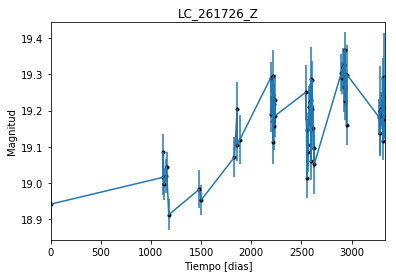

In [2]:
data = np.genfromtxt('LC_261726_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_261726_Z')
plt.savefig("LC_261726_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

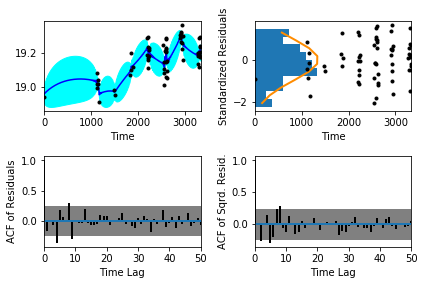

In [5]:
sample.assess_fit()

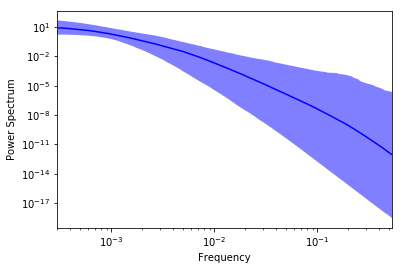

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

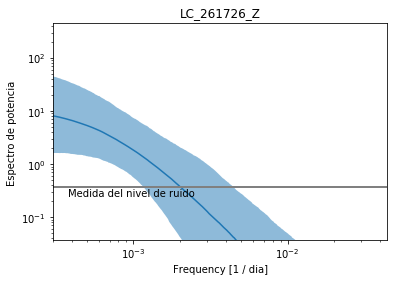

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_261726_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_261726_Z')

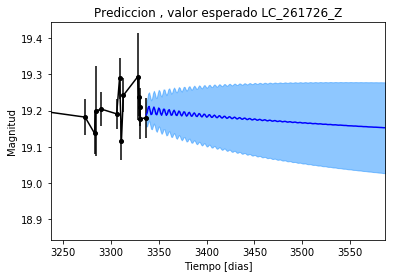

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_261726_Z')

Text(0.5,1,'Prediccion, Caminos simulados_LC_261726_Z')

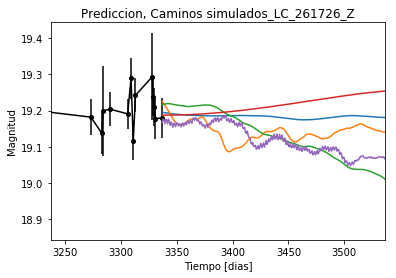

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_261726_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


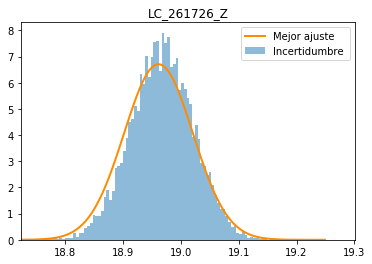

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_261726_Z')
plt.savefig("Mejor_ajuste_LC_261726_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_261726_Z')

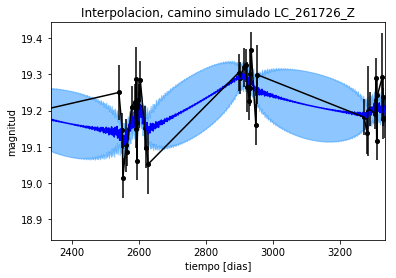

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_261726_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_261726_Z')

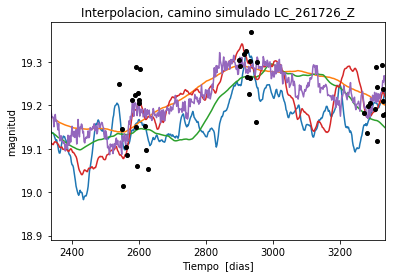

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_261726_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 761.007897639
Median: 0.0125918677729
Standard deviation: 0.199427399267
68% credibility interval: [ 0.00118276  0.2011746 ]
95% credibility interval: [  3.70555856e-04   7.85812386e-01]
99% credibility interval: [  3.05459130e-04   1.00746897e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 911.535174579
Median: 0.00219169081694
Standard deviation: 0.094016215268
68% credibility interval: [ 0.00047383  0.029869  ]
95% credibility interval: [ 0.00031582  0.28416081]
99% credibility interval: [  3.02975653e-04   6.93431065e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 739.830319692
Median: 0.0259931877484
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 827.16170374
Median: 106.992710496
Standard deviation: 1.5881027664
68% credibility interval: [ 105.1879237   108.07526265]
95% credibility interval: [ 102.63928092  108.68340128]
99% credibility interval: [ 100.69606106  109.03651948]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 823.36167335
Median: 0.845991391534
Standard deviation: 2.28949030267
68% credibility interval: [ 0.07562472  4.22720951]
95% credibility interval: [ 0.0162418   7.65434906]
99% credibility interval: [  0.01121093  11.03814056]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 998.211677136
Median: 0.47642144321
Standard deviation: 9.16130146862
68% credibility interval: [ 0.01568037  7.75795717]
95% credibility interval: [  9.91286901e-0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 4118.3219209
Median: 9.52943085026e-32
Standard deviation: 37989975952.9
68% credibility interval: [  4.85422075e-99   4.40795574e-10]
95% credibility interval: [  6.86095236e-122   1.94768927e+000]
99% credibility interval: [  9.31155303e-141   1.61441220e+002]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2702.79175477
Median: 19.1016813943
Standard deviation: 0.07372030543
68% credibility interval: [ 19.03873841  19.16087314]
95% credibility interval: [ 18.93906382  19.23992892]
99% credibility interval: [ 18.85053628  19.32360963]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 655.610710551
Median: 0.00557898070573
Standard deviation: 0.238726660981
68% credibility interval: [ 0.          0.31710205]
95% credibility interval: [ 0.          0.85730571]
99% credibility interval: [ 0.          1.00060355]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 655.610710551
Median: 0.00557898070573
Standard deviation: 0.238726660981
68% credibility interval: [ 0.          0.31710205]
95% credibility interval: [ 0.          0.85730571]
99% credibility interval: [ 0.          1.00060355]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1178.96425567
Median: 0.0
Standard deviation: 0.000422774671293
68% 

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 827.16170374
Median: 106.992710496
Standard deviation: 1.5881027664
68% credibility interval: [ 105.1879237   108.07526265]
95% credibility interval: [ 102.63928092  108.68340128]
99% credibility interval: [ 100.69606106  109.03651948]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1816.89690909
Median: 0.0163684305089
Standard deviation: 0.0226232002653
68% credibility interval: [ 0.00925112  0.0327367 ]
95% credibility interval: [ 0.00583738  0.0732465 ]
99% credibility interval: [ 0.00449116  0.14500329]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1658.41607576
Median: 1.09934163531
Standard deviation: 0.166946124747
68% credibility interval: [ 0.9503303   1.27856813]
95% credibility interval: [ 0.83367858  1.47939671]
99% credibility interval: [ 0.76513479  1.63288653]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 473.853121845
Median: 0.00011314802227
Standard deviation: 0.111071426323
68% credibility interval: [  1.49140320e-06   4.77519281e-03]
95% credibility interval: [  4.95581676e-08   1.67717544e-01]
99% credibility interval: [  6.52493962e-09   7.30886833e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 761.007897639
Median: (-0.0791170385808-0.35208030186j)
Standard deviation: 1.9544817848
68% credibility interval: [-1.26401730+0.j         -0.00743148-0.07533247j]
95% credibility interval: [ -4.93740484e+00+0.j          -2.32827111e-03-0.64326724j]
99% credibility interval: [ -6.33011421e+00+0.j          -1.91925632e-03-0.00149517j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 911.535174579
Median: (-0.0137707995389+1.22726725316j)
Standard deviation: 1.61209280271
68% credibility interval: [-0.18767246+0.10204848j -0.00297715+0.j        ]
95% credibility interval: [-1.78543501+3.29598868j -0.00198434+0.j        ]
99% credibility interval: [ -4.35695588e+00+4.4492528j   -1.90365217e-03+0.01436792j]
Posterior summa